# TYTUŁ

# Spis Treści

1. [Wczytanie i przekształcenie danych](#Wczytanie-i-dostosowanie-danych)
2. [Random forest](#Random-forest)
3. [Gradient boosting](#Gradient-boosting)
4. [Support vector machine](#Support-vector-machine)
5. [Xgboost](#Xgboost)

## Wczytanie i dostosowanie danych

Zaimportowane zostały biblioteki Pandas i NumPy. Następnie, dane zostały wczytane z pliku CSV do zmiennej data. W kolejnym kroku usunięte zostały wiersze zawierające brakujące dane, a indeksy wierszy zostały zresetowane. Ostatecznie zmienna data zawiera oczyszczone dane gotowe do analizy.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('train.csv')
data = data.dropna().reset_index(drop=True)

Klasa OneHotEncoder została zaimportowana z biblioteki sklearn.preprocessing i użyta do przekształcenia kategorialnej zmiennej zawierającej informacje o zawodach na kodowanie "one-hot". Następnie został stworzony nowy DataFrame z przekształconymi danymi, który został połączony z oryginalnym DataFrame 'data' po usunięciu kolumny zawierającej informacje o zawodach.

In [9]:
from sklearn.preprocessing import OneHotEncoder

profession_encoder = OneHotEncoder(sparse=False)
profession_encoded = profession_encoder.fit_transform(data[['Profession']])
profession_df = pd.DataFrame(profession_encoded, columns=profession_encoder.get_feature_names_out(['Profession']))
data = pd.concat([data.drop(['Profession'], axis=1), profession_df], axis=1)

c:\Users\Michalina\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


W tym fragmencie kodu, podobnie jak poprzednio, wykonuje się operację na zmiennej kategorialnej 'Var_1' z DataFrame 'data'. Tworzona jest instancja OneHotEncoder, kolumna 'Var_1' zostaje przekształcona na kodowanie "one-hot", następnie tworzony jest nowy DataFrame z przekształconymi danymi, który jest łączony z oryginalnym DataFrame 'data' po usunięciu kolumny 'Var_1'.

In [10]:
var_1_encoder = OneHotEncoder(sparse=False)
var_1_encoded = var_1_encoder.fit_transform(data[['Var_1']])
var_1_df = pd.DataFrame(var_1_encoded, columns=var_1_encoder.get_feature_names_out(['Var_1']))
data = pd.concat([data.drop(['Var_1'], axis=1), var_1_df], axis=1)

c:\Users\Michalina\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Klasa LabelEncoder została wykorzystana z modułu sklearn.preprocessing do przekształcenia kolumn kategorialnych w DataFrame 'data', takich jak 'Gender', 'Ever_Married', 'Graduated', 'Spending_Score' i 'Segmentation', na postać numeryczną. Dla każdej z tych kolumn została wywołana metoda fit_transform, która zapisuje przekształcone dane z powrotem do oryginalnej kolumny.

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Ever_Married', 'Graduated', 'Spending_Score', 'Segmentation']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

Klasy MinMaxScaler i train_test_split są importowane z odpowiednich modułów. Następnie tworzony jest zbiór X zawierający dane po usunięciu kolumn 'Segmentation' i 'ID' z DataFrame 'data', oraz zbiór y zawierający tylko kolumnę 'Segmentation'. Tworzona jest instancja MinMaxScaler i stosowana jest do przeskalowania zbioru X. Ostatecznie dane są dzielone na zbiory treningowe i testowe, gdzie X_train i y_train zawierają dane treningowe, a X_test i y_test zawierają dane testowe. Podział odbywa się w proporcji 80% do 20%, a random_state=42 zapewnia powtarzalność wyników.

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = data.drop('Segmentation', axis=1)
X = X.drop('ID', axis=1)
y = data['Segmentation']

scaler = MinMaxScaler()
X= scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random forest
1. Moduły sklearn.ensemble, sklearn.metrics, sklearn.model_selection oraz matplotlib.pyplot są wykorzystywane do trenowania modelu 
2. RandomForestClassifier, optymalizacji jego parametrów za pomocą GridSearchCV oraz oceny jego dokładności. 
3. Klasyfikator RandomForestClassifier jest tworzony z domyślnym ziarnem losowości (random_state=42). 
4. Definiowany jest parametr grid dla GridSearchCV, zawierający zestawy różnych wartości hiperparametrów modelu RandomForest. 
5. GridSearchCV jest używany do przeszukania przestrzeni parametrów zdefiniowanej przez param_grid_rf, korzystając z walidacji krzyżowej z 3 foldami (cv=3). 
5. Najlepszy model uzyskany za pomocą GridSearchCV jest dopasowywany do danych treningowych (X_train, y_train). 
6. Model jest wykorzystywany do przewidywania etykiet dla danych testowych (X_test), a następnie oceniana jest jego dokładność za pomocą metryki accuracy_score. 
7. Dokładność modelu RandomForest z optymalizacją GridSearchCV jest wydrukowana na ekranie.

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

rf_clf = RandomForestClassifier(random_state=42)

# Grid Search dla RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=3)
grid_search_rf.fit(X_train, y_train)
# Predykcja i dokładność dla RandomForest z GridSearch
y_pred_rf_grid = grid_search_rf.best_estimator_.predict(X_test)
accuracy_rf_grid = accuracy_score(y_test, y_pred_rf_grid)

print("Dokładność modelu RandomForest z GridSearch:", accuracy_rf_grid)

Dokładność modelu RandomForest z GridSearch: 0.5311327831957989


In [18]:
print("Najlepsze parametry dla modelu RandomForest:")
print(grid_search_rf.best_params_)

Najlepsze parametry dla modelu RandomForest:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Generowana i wyświetlana jest macierz pomyłek dla modelu RandomForestClassifier na danych testowych.
Najpierw tworzona jest macierz pomyłek za pomocą funkcji confusion_matrix z modułu sklearn.metrics. Następnie macierz pomyłek jest wyświetlana za pomocą funkcji imshow z biblioteki matplotlib, aby zobrazować pomyłki między prawdziwymi etykietami a przewidywanymi etykietami.
Dodatkowo, etykiety klas są dodawane do osi x i y, a liczby w macierzy pomyłek są wyświetlane w odpowiednich komórkach, gdzie kolor tekstu jest zmieniany w zależności od wartości komórki (biały dla większych wartości, czarny dla mniejszych wartości).
Na końcu dodawane są tytuły, opisy osi oraz wyświetlane jest okno z macierzą pomyłek.

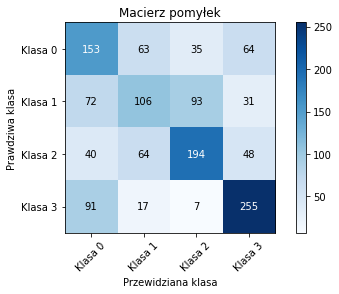

In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_grid)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Macierz pomyłek')
plt.colorbar()
classes = ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3']  # Etykiety klas
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Prawdziwa klasa')
plt.xlabel('Przewidziana klasa')
plt.show()

Obliczany jest współczynnik Kappa Cohena dla modelu Gradient Boosting Classifier, korzystając z funkcji cohen_kappa_score z modułu sklearn.metrics. Wynik zostaje wydrukowany na ekranie.

In [15]:
from sklearn.metrics import cohen_kappa_score

# Prawdziwe etykiety (y_true) i przewidywane etykiety (y_pred) dla Gradient Boosting Classifier
# Załóżmy, że y_true i y_pred są zdefiniowane

# Obliczenie współczynnika Kappa Cohena
kappa = cohen_kappa_score(y_test, y_pred_rf_grid)

print("Współczynnik Kappa Cohena dla Gradient Boosting Classifier:", kappa)

Współczynnik Kappa Cohena dla Gradient Boosting Classifier: 0.3727200515000132


Obliczana i wyświetlana jest krzywa ROC dla klasyfikacji czteroklasowej przy użyciu modelu RandomForestClassifier, który został zoptymalizowany za pomocą GridSearchCV.
Najpierw, dla każdej klasy, obliczane są współczynniki fałszywie pozytywnych (fpr) i prawdziwie pozytywnych (tpr) oraz obszary pod krzywymi ROC (roc_auc) za pomocą funkcji roc_curve i auc.
Następnie, dla każdej klasy, krzywe ROC są rysowane przy użyciu plt.plot, a także dodawana jest linia odniesienia (linia przekątnej), która reprezentuje klasyfikację losową.
Na końcu, wykres jest wyświetlany za pomocą plt.show().

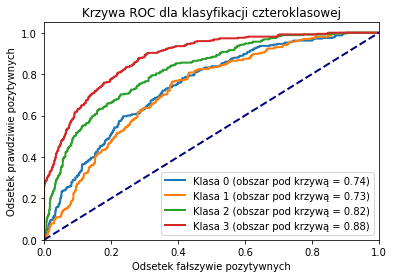

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_prob = grid_search_rf.predict_proba(X_test)

# 7. Obliczenie krzywej ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(grid_search_rf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 8. Wyświetlenie krzywej ROC
plt.figure()
for i in range(len(grid_search_rf.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='Klasa {0} (obszar pod krzywą = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek fałszywie pozytywnych')
plt.ylabel('Odsetek prawdziwie pozytywnych')
plt.title('Krzywa ROC dla klasyfikacji czteroklasowej')
plt.legend(loc="lower right")
plt.show()

## Gradient boosting

Przeprowadzany jest proces dopasowania GradientBoostingClassifier za pomocą metody GridSearchCV w celu optymalizacji jego parametrów.</br>
Najpierw, tworzony jest klasyfikator GradientBoostingClassifier z domyślnym ziarnem losowości (random_state=42).</br>
Następnie, definiowany jest parametr grid dla GridSearchCV, zawierający zestawy różnych wartości hiperparametrów modelu GradientBoosting.</br>
GridSearchCV jest używany do przeszukania przestrzeni parametrów zdefiniowanej przez param_grid_gb, korzystając z walidacji krzyżowej z 3 foldami (cv=3).</br>
Następnie, najlepszy model uzyskany za pomocą GridSearchCV jest dopasowywany do danych treningowych (X_train, y_train).</br>
Model jest wykorzystywany do przewidywania etykiet dla danych testowych (X_test), a następnie oceniana jest jego dokładność za pomocą metryki accuracy_score.</br>
Na koniec, wydrukowana jest dokładność modelu GradientBoosting z optymalizacją GridSearchCV oraz najlepsze parametry znalezione przez GridSearchCV.

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=42)

# Grid Search dla GradientBoosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=3)
grid_search_gb.fit(X_train, y_train)
# Predykcja i dokładność dla GradientBoosting z GridSearch
y_pred_gb_grid = grid_search_gb.best_estimator_.predict(X_test)
accuracy_gb_grid = accuracy_score(y_test, y_pred_gb_grid)

print("Dokładność modelu GradientBoosting z GridSearch:", accuracy_gb_grid)

print("Najlepsze parametry dla modelu GradientBoosting:")
print(grid_search_gb.best_params_)


Najpierw, używając funkcji confusion_matrix z modułu sklearn.metrics, tworzona jest macierz pomyłek na podstawie rzeczywistych etykiet (y_test) i przewidywanych etykiet (y_pred_gb_grid).</br>
Następnie, macierz pomyłek jest wyświetlana za pomocą funkcji imshow z biblioteki matplotlib, aby zobrazować pomyłki między prawdziwymi etykietami a przewidywanymi etykietami.</br>
Dodatkowo, etykiety klas są dodawane do osi x i y, a liczby w macierzy pomyłek są wyświetlane w odpowiednich komórkach, gdzie kolor tekstu jest zmieniany w zależności od wartości komórki (biały dla większych wartości, czarny dla mniejszych wartości).</br>
Na końcu dodawane są tytuły, opisy osi oraz wyświetlane jest okno z macierzą pomyłek.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gb_grid)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Macierz pomyłek')
plt.colorbar()
classes = ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3']  # Etykiety klas
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Prawdziwa klasa')
plt.xlabel('Przewidziana klasa')
plt.show()

Współczynnik Kappa Cohena dla modelu Gradient Boosting Classifier jest obliczany przy użyciu funkcji cohen_kappa_score z modułu sklearn.metrics, a następnie wydrukowany na ekranie.

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Prawdziwe etykiety (y_true) i przewidywane etykiety (y_pred) dla Gradient Boosting Classifier
# Załóżmy, że y_true i y_pred są zdefiniowane

# Obliczenie współczynnika Kappa Cohena
kappa = cohen_kappa_score(y_test, y_pred_gb_grid)

print("Współczynnik Kappa Cohena dla Gradient Boosting Classifier:", kappa)


Krzywa ROC jest obliczana i wyświetlana dla klasyfikacji czteroklasowej przy użyciu modelu GradientBoostingClassifier, który został zoptymalizowany za pomocą GridSearchCV.</br>
Najpierw, dla każdej klasy, obliczane są współczynniki fałszywie pozytywnych (fpr) i prawdziwie pozytywnych (tpr) oraz obszary pod krzywymi ROC (roc_auc) za pomocą funkcji roc_curve i auc.</br>
Następnie, dla każdej klasy, krzywe ROC są rysowane przy użyciu plt.plot, a także dodawana jest linia odniesienia (linia przekątnej), która reprezentuje klasyfikację losową.</br>
Na końcu, wykres jest wyświetlany za pomocą plt.show().

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_prob = grid_search_gb.predict_proba(X_test)

# 7. Obliczenie krzywej ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(grid_search_gb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 8. Wyświetlenie krzywej ROC
plt.figure()
for i in range(len(grid_search_gb.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='Klasa {0} (obszar pod krzywą = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek fałszywie pozytywnych')
plt.ylabel('Odsetek prawdziwie pozytywnych')
plt.title('Krzywa ROC dla klasyfikacji czteroklasowej')
plt.legend(loc="lower right")
plt.show()

## Support vector machine
Najpierw, tworzony jest klasyfikator SVM za pomocą klasy SVC z wybranym jądrem 'linear', strategią decyzyjną 'ovr' (one-vs-rest) i domyślnym ziarnem losowości (random_state=42).</br>
Następnie, definiowany jest parametr grid dla GridSearchCV, zawierający zestawy różnych wartości hiperparametrów modelu SVM, takich jak parametr regularyzacji C, typ jądra (kernel) oraz współczynnik jądra gamma.</br>
GridSearchCV jest używany do przeszukania przestrzeni parametrów zdefiniowanej przez param_grid_svm, korzystając z walidacji krzyżowej z 3 foldami (cv=3).</br>
Następnie, najlepszy model uzyskany za pomocą GridSearchCV jest dopasowywany do danych treningowych (X_train, y_train).
Model jest wykorzystywany do przewidywania etykiet dla danych testowych (X_test), a następnie oceniana jest jego dokładność za pomocą metryki accuracy_score.</br>
Na końcu, wydrukowana jest dokładność modelu SVM z optymalizacją GridSearchCV oraz najlepsze parametry znalezione przez GridSearchCV.

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)

# Grid Search dla SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Parametr regularyzacji
    'kernel': ['linear', 'rbf', 'poly'],  # Typ jądra
    'gamma': ['scale', 'auto']  # Współczynnik jądra dla 'rbf' i 'poly'
}
grid_search_svm = GridSearchCV(estimator=svm_clf, param_grid=param_grid_svm, cv=3)
grid_search_svm.fit(X_train, y_train)
# Predykcja i dokładność dla SVM z GridSearch
y_pred_svm_grid = grid_search_svm.best_estimator_.predict(X_test)
accuracy_svm_grid = accuracy_score(y_test, y_pred_svm_grid)

print("Dokładność modelu SVM z GridSearch:", accuracy_svm_grid)

print("Najlepsze parametry dla modelu SVM:")
print(grid_search_svm.best_params_)


Używając funkcji confusion_matrix z modułu sklearn.metrics, tworzona jest macierz pomyłek na podstawie rzeczywistych etykiet (y_test) i przewidywanych etykiet (y_pred_svm_grid).</br>
Następnie, macierz pomyłek jest wyświetlana za pomocą funkcji imshow z biblioteki matplotlib, aby zobrazować pomyłki między prawdziwymi etykietami a przewidywanymi etykietami.</br>
Dodatkowo, etykiety klas są dodawane do osi x i y, a liczby w macierzy pomyłek są wyświetlane w odpowiednich komórkach, gdzie kolor tekstu jest zmieniany w zależności od wartości komórki (biały dla większych wartości, czarny dla mniejszych wartości).</br>
Na końcu dodawane są tytuły, opisy osi oraz wyświetlane jest okno z macierzą pomyłek.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_svm_grid)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Macierz pomyłek')
plt.colorbar()
classes = ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3']  # Etykiety klas
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Prawdziwa klasa')
plt.xlabel('Przewidziana klasa')
plt.show()

Obliczany jest współczynnik Kappa Cohena dla modelu SVM przy użyciu funkcji cohen_kappa_score z modułu sklearn.metrics. Wynik jest następnie wydrukowany na ekranie.

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Prawdziwe etykiety (y_true) i przewidywane etykiety (y_pred) dla Gradient Boosting Classifier
# Załóżmy, że y_true i y_pred są zdefiniowane

# Obliczenie współczynnika Kappa Cohena
kappa = cohen_kappa_score(y_test, y_pred_svm_grid)

print("Współczynnik Kappa Cohena dla Gradient Boosting Classifier:", kappa)

Dla każdej klasy, obliczane są współczynniki fałszywie pozytywnych (fpr) i prawdziwie pozytywnych (tpr) oraz obszary pod krzywymi ROC (roc_auc) za pomocą funkcji roc_curve i auc.</br>
Następnie, dla każdej klasy, krzywe ROC są rysowane przy użyciu plt.plot, a także dodawana jest linia odniesienia (linia przekątnej), która reprezentuje klasyfikację losową.</br>
Na końcu, wykres jest wyświetlany za pomocą plt.show().

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_prob = grid_search_svm.predict_proba(X_test)

# 7. Obliczenie krzywej ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(grid_search_svm.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 8. Wyświetlenie krzywej ROC
plt.figure()
for i in range(len(grid_search_svm.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='Klasa {0} (obszar pod krzywą = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek fałszywie pozytywnych')
plt.ylabel('Odsetek prawdziwie pozytywnych')
plt.title('Krzywa ROC dla klasyfikacji czteroklasowej')
plt.legend(loc="lower right")
plt.show()

## Xgboost
Tworzony jest klasyfikator XGBClassifier z wybranymi parametrami, takimi jak funkcja celu (objective), liczba klas (num_class) oraz domyślne ziarno losowości (random_state=42).</br>
Następnie, definiowany jest parametr grid dla GridSearchCV, zawierający zestawy różnych wartości hiperparametrów modelu XGBoost, takich jak współczynnik uczenia (learning_rate), liczba drzew (n_estimators), maksymalna głębokość drzewa (max_depth) oraz minimalna suma wag dla dziecka (min_child_weight).</br>
GridSearchCV jest używany do przeszukania przestrzeni parametrów zdefiniowanej przez param_grid_xgb, korzystając z walidacji krzyżowej z 3 foldami (cv=3).</br>
Następnie, najlepszy model uzyskany za pomocą GridSearchCV jest dopasowywany do danych treningowych (X_train, y_train).</br>
Model jest wykorzystywany do przewidywania etykiet dla danych testowych (X_test), a następnie oceniana jest jego dokładność za pomocą metryki accuracy_score.

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

# Grid Search dla XGBoost
param_grid_xgb = {
    'learning_rate': [0.1, 0.2],  # Współczynnik uczenia
    'n_estimators': [100, 150],  # Liczba drzew
    'max_depth': [3, 5],  # Maksymalna głębokość drzewa
    'min_child_weight': [1, 5],  # Minimalna suma wag dla dziecka
}
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train, y_train)
# Predykcja i dokładność dla XGBoost z GridSearch
y_pred_xgb_grid = grid_search_xgb.best_estimator_.predict(X_test)
accuracy_xgb_grid = accuracy_score(y_test, y_pred_xgb_grid)

print("Dokładność modelu XGBoost z GridSearch:", accuracy_xgb_grid)

print("Najlepsze parametry dla modelu XGBoost:")
print(grid_search_xgb.best_params_)

Używając funkcji confusion_matrix z modułu sklearn.metrics, tworzona jest macierz pomyłek na podstawie rzeczywistych etykiet (y_test) i przewidywanych etykiet (y_pred_xgb_grid).</br>
Następnie, macierz pomyłek jest wyświetlana za pomocą funkcji imshow z biblioteki matplotlib, aby zobrazować pomyłki między prawdziwymi etykietami a przewidywanymi etykietami.</br>
Dodatkowo, etykiety klas są dodawane do osi x i y, a liczby w macierzy pomyłek są wyświetlane w odpowiednich komórkach, gdzie kolor tekstu jest zmieniany w zależności od wartości komórki (biały dla większych wartości, czarny dla mniejszych wartości).</br>
Na końcu dodawane są tytuły, opisy osi oraz wyświetlane jest okno z macierzą pomyłek.

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb_grid)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Macierz pomyłek')
plt.colorbar()
classes = ['Klasa 0', 'Klasa 1', 'Klasa 2', 'Klasa 3']  # Etykiety klas
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('Prawdziwa klasa')
plt.xlabel('Przewidziana klasa')
plt.show()

Obliczany jest współczynnik Kappa Cohena dla modelu XGBoost przy użyciu funkcji cohen_kappa_score z modułu sklearn.metrics. Wynik jest następnie wydrukowany na ekranie.

In [ ]:
from sklearn.metrics import cohen_kappa_score

# Prawdziwe etykiety (y_true) i przewidywane etykiety (y_pred) dla Gradient Boosting Classifier
# Załóżmy, że y_true i y_pred są zdefiniowane

# Obliczenie współczynnika Kappa Cohena
kappa = cohen_kappa_score(y_test, y_pred_xgb_grid)

print("Współczynnik Kappa Cohena dla Gradient Boosting Classifier:", kappa)

Dla każdej klasy, obliczane są współczynniki fałszywie pozytywnych (fpr) i prawdziwie pozytywnych (tpr) oraz obszary pod krzywymi ROC (roc_auc) za pomocą funkcji roc_curve i auc.</br>
Następnie, dla każdej klasy, krzywe ROC są rysowane przy użyciu plt.plot, a także dodawana jest linia odniesienia (linia przekątnej), która reprezentuje klasyfikację losową.
Na końcu, wykres jest wyświetlany za pomocą plt.show().

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

y_prob = grid_search_xgb.predict_proba(X_test)

# 7. Obliczenie krzywej ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(grid_search_xgb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 8. Wyświetlenie krzywej ROC
plt.figure()
for i in range(len(grid_search_xgb.classes_)):
    plt.plot(fpr[i], tpr[i], lw=2, label='Klasa {0} (obszar pod krzywą = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Odsetek fałszywie pozytywnych')
plt.ylabel('Odsetek prawdziwie pozytywnych')
plt.title('Krzywa ROC dla klasyfikacji czteroklasowej')
plt.legend(loc="lower right")
plt.show()

Na podstawie przeprowadzonych analiz wybrano model Gradient Boosting jako najlepszy w klasyfikacji czterech klas.</br> Model ten osiągnął najwyższą dokładność w porównaniu z innymi modelami, a jego optymalne parametry to:
* learning_rate: 0.1
* max_depth: 3
* min_samples_leaf: 1
* min_samples_split: 5
* n_estimators: 50

Modele z innymi algorytmami, takimi jak SVM, XGBoost i RandomForest, zostały przetestowane, jednak model Gradient Boosting osiągnął najwyższą wydajność i skuteczność.

In [ ]:
import pickle

with open('model_rf.pkl', 'wb') as f:
    pickle.dump(model, f)